### Grouping algorithm ran on the GAMA II data for 0.002 < z < 0.65

In [1]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from GalGroup import *

In [2]:
hdul = fits.open('TilingCatv46.fits')
data = hdul[1].data
t=Table(data)
df = t.to_pandas()

In [3]:
df = add_column(df, column_name='Z_TONRY')
df = add_column(df, column_file = 'Eqkcorr_auto_z00v05.fits', column_name = 'KCORR_R', common_column = 'CATAID')

In [4]:
df = df[(df['SURVEY_CLASS']>=4) & (df['NQ']>=3) & (df['Z_TONRY']>0.002) & (df['Z_TONRY']<0.65) & (df['R_PETRO']<19.8)]

In [5]:
df

,CATAID,OBJID,RA,DEC,FIBERMAG_R,R_PETRO,U_MODEL,G_MODEL,R_MODEL,I_MODEL,...,SURVEY_CLASS,PRIORITY_CLASS,NEIGHBOUR_CLASS,TC_V11_ID,MASK_IC_10,MASK_IC_12,VIS_CLASS,VIS_CLASS_USER,Z_TONRY,KCORR_R
0,585589,588848899914203328,183.480648,-0.158225,19.985600,19.453074,21.894562,20.529739,19.453663,18.945805,...,5,2,0,585589,0.0,0.0,255,xxx,0.184803,0.250879
1,585591,588848899914203338,183.497895,-0.167664,18.726801,17.603594,19.758217,18.387272,17.655390,17.203344,...,6,2,1,585591,0.0,0.0,0,xxx,0.125614,0.168025
3,585592,588848899914203383,183.462863,-0.084334,19.729465,18.439117,21.375816,19.530548,18.330122,17.764397,...,6,2,0,585592,0.0,0.0,0,xxx,0.180388,0.255382
4,585597,588848899914203421,183.459417,-0.147435,20.720388,19.627613,21.248838,20.511686,19.509012,19.120184,...,5,2,1,585597,0.0,0.0,0,xxx,0.438662,0.263200
6,585600,588848899914203456,183.428237,-0.024423,20.539886,19.335196,20.904034,19.648397,19.229986,18.944212,...,6,2,0,585600,0.0,0.0,0,xxx,0.123741,0.114565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221366,585568,588848899914137824,183.355331,-0.161464,19.925093,18.819307,20.849813,19.561117,18.809334,18.452356,...,6,2,1,585568,0.0,0.0,0,xxx,0.126025,0.136362
221368,585576,588848899914137896,183.346806,-0.172458,20.530943,19.687235,21.441959,20.567142,19.603834,19.201668,...,5,2,0,585576,0.0,0.0,255,xxx,0.324489,0.286093
221369,585577,588848899914137903,183.389071,-0.029114,20.450537,19.387207,20.815376,19.913673,19.304747,19.085520,...,6,2,0,585577,0.0,0.0,255,xxx,0.202304,0.074062
221370,585574,588848899914137839,183.415321,-0.207848,19.690861,18.615723,22.564413,20.321875,18.613150,18.036314,...,6,2,0,585574,0.0,0.0,255,xxx,0.321785,0.455054


Constants used : H0 = 100 , Om0 = 0.25 , Ode0 = 0.75 , h = 1.0 km / (Mpc s) , alpha = -1.26 , M_star = -20.71 , phi_star = 0.009549925860214359 , b0 = 0.06 , R0 = 18 , Eb = -0.0 , Er = -0.02 , nu = 0.63 , delta = 9 , r_delta = 1500000.0 , l_delta = 12000000.0
Setting up the Group finder : 
Calculating rho_bar ...


0it [00:00, ?it/s]

Calculating rho_emp ...


  0%|          | 0/182337 [00:00<?, ?it/s]

  0%|          | 0/182337 [00:00<?, ?it/s]

Calculating R and b ...


  0%|          | 0/182337 [00:00<?, ?it/s]

Calculating D_lim ...


  0%|          | 0/182337 [00:00<?, ?it/s]

347 galaxies removed due to having D_lim > 10**8
Running the Group finder : 
Finding groups ...


  0%|          | 0/181990 [00:00<?, ?it/s]

Writing groups to a dataframe ...


  0%|          | 0/25786 [00:00<?, ?it/s]

  0%|          | 0/25786 [00:00<?, ?it/s]

Calculating group velocity dispersion ...


  0%|          | 0/25786 [00:00<?, ?it/s]

102 groups removed due to having Vel_Disp > 2500
Calculating group projected radius ...


  0%|          | 0/25684 [00:00<?, ?it/s]

Calculating group dynamical mass ...


  0%|          | 0/25684 [00:00<?, ?it/s]

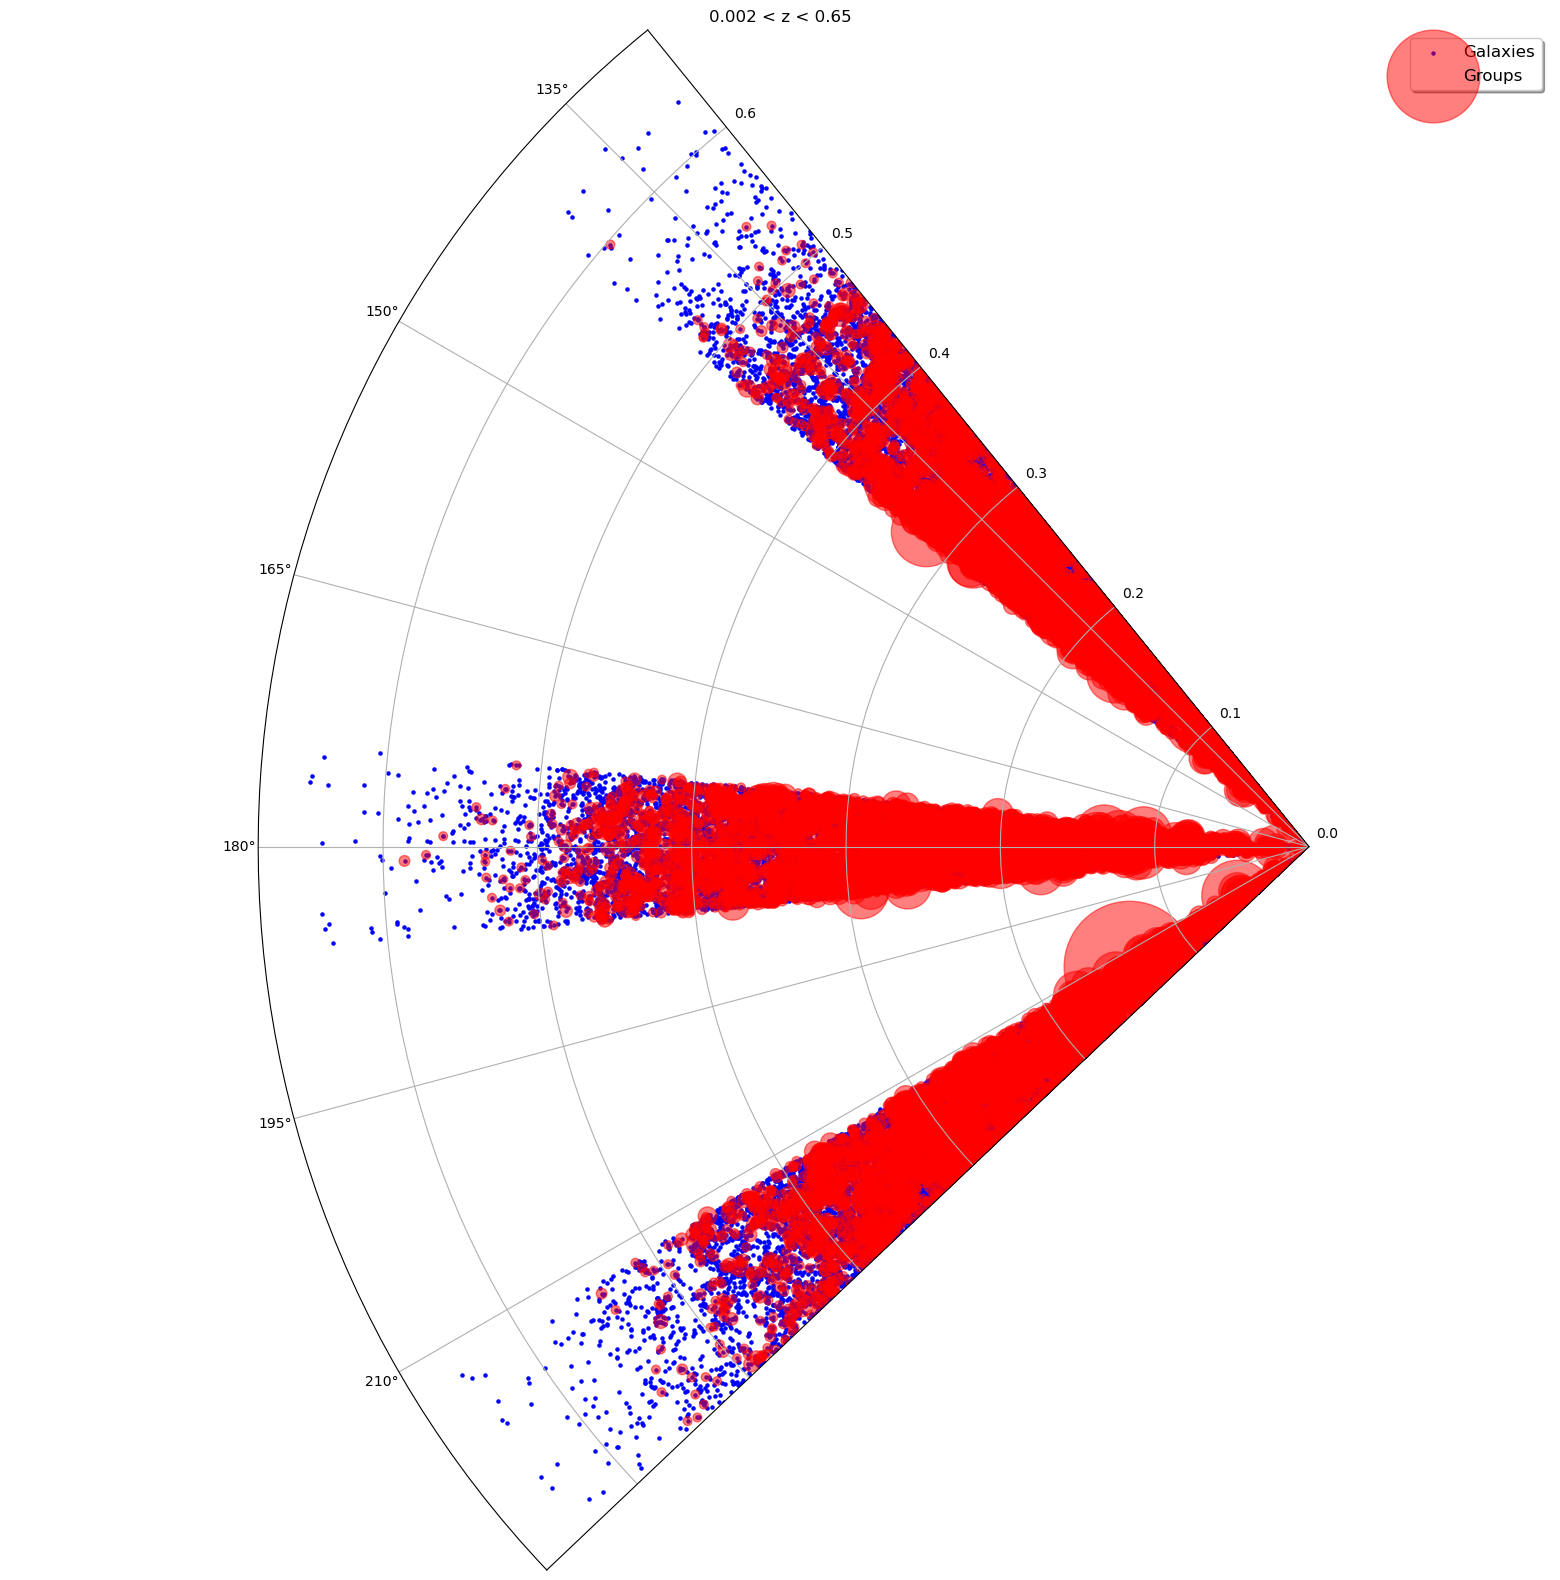

In [6]:
dfRec, df = main(dataframe = df, zmin=0.002, zmax=0.65, mag_col = 'R_PETRO', Z_col = 'Z_TONRY', Kcorr_col = 'KCORR_R', 
                 vel_err_col = 'VEL_ERR', RA_col = 'RA', Dec_col = 'DEC', ID_col = 'CATAID', H0=100, Om0=0.25, Ode0=0.75)

In [7]:
df

,CATAID,OBJID,RA,DEC,FIBERMAG_R,R_PETRO,U_MODEL,G_MODEL,R_MODEL,I_MODEL,...,IndexLoc,Num_Den,rho_emp,b,R,D0,Ang_link,Los_link,RecID,v
0,585589,588848899914203328,183.480648,-0.158225,19.985600,19.453074,21.894562,20.529739,19.453663,18.945805,...,0,4,0.047157,0.06,16.816601,4.738659e+06,0.000532,4.781288e+06,0,55402664.0
1,585591,588848899914203338,183.497895,-0.167664,18.726801,17.603594,19.758217,18.387272,17.655390,17.203344,...,1,30,0.353678,0.06,16.139212,4.749615e+06,0.000776,4.599303e+06,0,37658028.0
2,585592,588848899914203383,183.462863,-0.084334,19.729465,18.439117,21.375816,19.530548,18.330122,17.764397,...,2,3,0.035368,0.06,16.646152,5.599990e+06,0.000644,5.593097e+06,0,54078984.0
3,585597,588848899914203421,183.459417,-0.147435,20.720388,19.627613,21.248838,20.511686,19.509012,19.120184,...,3,1,0.011789,0.06,15.313922,1.617238e+07,0.000810,1.485976e+07,0,131507560.0
4,585600,588848899914203456,183.428237,-0.024423,20.539886,19.335196,20.904034,19.648397,19.229986,18.944212,...,4,21,0.247574,0.06,16.658008,3.671265e+06,0.000608,3.669358e+06,0,37096748.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181985,585568,588848899914137824,183.355331,-0.161464,19.925093,18.819307,20.849813,19.561117,18.809334,18.452356,...,181985,26,0.306521,0.06,16.490825,3.903459e+06,0.000635,3.862276e+06,165785,37781340.0
181986,585576,588848899914137896,183.346806,-0.172458,20.530943,19.687235,21.441959,20.567142,19.603834,19.201668,...,181986,7,0.082525,0.06,15.722526,8.488629e+06,0.000560,8.007762e+06,123471,97279256.0
181987,585577,588848899914137903,183.389071,-0.029114,20.450537,19.387207,20.815376,19.913673,19.304747,19.085520,...,181987,1,0.011789,0.06,17.197063,5.018810e+06,0.000517,5.178528e+06,0,60649276.0
181988,585574,588848899914137839,183.415321,-0.207848,19.690861,18.615723,22.564413,20.321875,18.613150,18.036314,...,181988,7,0.082525,0.06,14.814770,1.585810e+07,0.001054,1.409605e+07,123471,96468752.0


In [8]:
dfRec

,RecID,N,CentreID,Z,RA,Dec,CentreCATAID,VelDisp_raw,VelDisp,Rad,DynMass
0,7,3,221371,0.022569,183.516495,-0.069650,585584,122.102068,120.588467,0.101883,3.444634e+12
1,11,2,11,0.186234,183.601602,-0.186273,585607,209.314954,208.049239,0.009537,9.597509e+11
2,12,3,12,0.249128,183.574233,-0.078266,585606,346.009282,344.578172,0.433933,1.197923e+14
3,15,4,23,0.075863,183.743956,-0.076603,585625,116.610015,115.146028,0.049655,1.530696e+12
4,18,2,165826,0.251560,183.688451,-0.130062,585613,27.021813,0.000000,0.141101,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
25679,221149,2,221149,0.346235,181.846689,-0.163601,585248,726.475015,725.583443,0.245439,3.004339e+14
25680,221237,3,221237,0.401976,182.535238,-0.186287,585371,827.215179,826.341424,0.410653,6.519660e+14
25681,221241,2,221241,0.276408,182.549114,-0.186314,585375,79.573775,66.634829,0.372740,3.848034e+12
25682,221247,3,221247,0.051632,182.648249,-0.171495,585386,72.386161,70.338897,0.081980,9.430438e+11
